In [ ]:
import urllib.request

for filename in ['en_ewt-ud-train.conllu', 'en_ewt-ud-dev.conllu', 'en_ewt-ud-test.conllu']:
  urllib.request.urlretrieve('https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/' + filename, filename)

with open('en_ewt-ud-train.conllu') as fp:
  for line in fp.readlines()[:10]:
    print(line, end='')

# newdoc id = weblog-juancole.com_juancole_20051126063000_ENG_20051126_063000
# sent_id = weblog-juancole.com_juancole_20051126063000_ENG_20051126_063000-0001
# newpar id = weblog-juancole.com_juancole_20051126063000_ENG_20051126_063000-p0001
# text = Al-Zaman : American forces killed Shaikh Abdullah al-Ani, the preacher at the mosque in the town of Qaim, near the Syrian border.
1	Al	Al	PROPN	NNP	Number=Sing	0	root	0:root	SpaceAfter=No
2	-	-	PUNCT	HYPH	_	1	punct	1:punct	SpaceAfter=No
3	Zaman	Zaman	PROPN	NNP	Number=Sing	1	flat	1:flat	_
4	:	:	PUNCT	:	_	1	punct	1:punct	_
5	American	American	ADJ	JJ	Degree=Pos	6	amod	6:amod	_
6	forces	force	NOUN	NNS	Number=Plur	7	nsubj	7:nsubj	_


In [ ]:
print(filename)

en_ewt-ud-test.conllu


In [ ]:
!pip -q install conllu

import conllu

def load_conllu(filename):
  with open(filename) as fp:
    data = conllu.parse(fp.read())
  sentences = [[token['form'] for token in sentence] for sentence in data]
  taggings = [[token['xpos'] for token in sentence] for sentence in data]

  return sentences, taggings

train_sentences, train_taggings = load_conllu('en_ewt-ud-train.conllu')
valid_sentences, valid_taggings = load_conllu('en_ewt-ud-dev.conllu')
test_sentences, test_taggings = load_conllu('en_ewt-ud-test.conllu')

print(train_sentences[0])

#print(list(zip(train_sentences[42], train_taggings[42])))

['Al', '-', 'Zaman', ':', 'American', 'forces', 'killed', 'Shaikh', 'Abdullah', 'al', '-', 'Ani', ',', 'the', 'preacher', 'at', 'the', 'mosque', 'in', 'the', 'town', 'of', 'Qaim', ',', 'near', 'the', 'Syrian', 'border', '.']


In [ ]:
print(list(zip(train_sentences[182], train_taggings[182])))

[('Gore', 'NNP'), ('released', 'VBD'), ('a', 'DT'), ('statement', 'NN'), ('Friday', 'NNP'), ('taking', 'VBG'), ('Bush', 'NNP'), ('to', 'IN'), ('task', 'NN'), ('for', 'IN'), ('his', 'PRP$'), ('comments', 'NNS'), ('on', 'IN'), ("Pakistan's", None), ('Pakistan', 'NNP'), ("'s", 'POS'), ('recent', 'JJ'), ('coup', 'NN'), ('.', '.')]


In [ ]:
# use a defaultdict to count the number of occurrences of each tag
import collections
tagset = collections.defaultdict(int)

for idx, sentence in enumerate(train_sentences):
  for idy, word in enumerate(sentence):
    if(word=="move"):
      break


for tagging in train_taggings:
  for tag in tagging:
    tagset[tag] += 1

print(train_taggings[857][24])

print(train_sentences[857][24])
print('number of different tags:', len(tagset))

# print count and tag sorted by decreasing count
for tag, count in sorted(tagset.items(), reverse=True, key=lambda x: x[1]):
  print(count, tag)

NN
move
number of different tags: 51
26920 NN
20888 IN
16845 DT
12401 NNP
12220 PRP
11588 JJ
10592 RB
10317 .
9492 VB
8450 NNS
8062 ,
6693 CC
5407 VBD
5356 VBP
4572 VBZ
4002 CD
3962 VBN
3330 VBG
3293 MD
3283 TO
3044 PRP$
2615 None
1007 -RRB-
973 -LRB-
950 WDT
867 :
845 WRB
813 ``
785 ''
761 WP
758 RP
696 UH
684 POS
661 HYPH
573 NNPS
511 JJR
446 JJS
361 EX
338 NFP
316 RBR
292 ADD
292 GW
257 $
175 PDT
160 SYM
117 LS
101 RBS
93 FW
48 AFX
15 WP$
1 XX


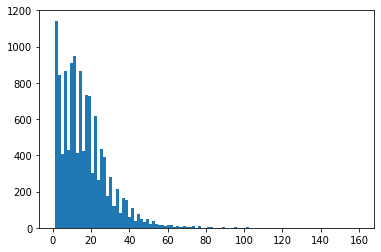

max length: 160
avg length: 16.521406362114327
longest sentence: ['Antichrist', 'John', 'Lennon', 'wanted', 'to', 'compete', 'with', 'Jesus', 'Christ', ',', 'and', 'so', 'he', 'grew', 'a', 'beard', 'and', 'started', 'to', 'make', 'a', 'bogus', 'role', 'of', 'Christ', 'together', 'with', 'Yoko', 'Ono', 'at', 'the', 'Amsterdam', 'Hilton', 'hotel', 'proclaiming', '"', 'Peace', '"', ',', 'being', 'then', 'when', 'he', 'was', 'visited', 'by', 'the', 'Canadian', 'journalist', 'who', 'ridiculized', 'and', 'admonished', 'him', 'wanting', 'to', 'know', 'about', 'what', 'Lennon', 'meant', 'when', 'he', 'wrote', 'in', 'the', 'lyrics', 'of', '"', 'The', 'ballad', 'of', 'John', 'and', 'Yoko', '"', ':', '"', 'the', 'way', 'things', 'are', 'going', ',', "they're", 'they', "'re", 'going', 'to', 'crucify', 'me', '...', '"', ',', 'The', 'CURSE', 'OF', 'GOD', 'upon', 'John', 'Lennon', 'carried', 'on', 'with', 'all', 'type', 'of', 'miseries', 'and', 'distresses', 'which', 'made', 'Lennon', 'give', 'the', 

In [ ]:
from matplotlib import pyplot as plt

# compute and show histogram for sentence length
plt.hist([len(sentence) for sentence in train_sentences], 100)
plt.show()

# compute max sentence length
print('max length:', max([len(sentence) for sentence in train_sentences]))

# compute avg sentence length
print('avg length:', sum([len(sentence) for sentence in train_sentences])/len([len(sentence) for sentence in train_sentences]))

length_list=[len(sentence) for sentence in train_sentences]
index = length_list.index(160)
print("longest sentence:", train_sentences[index])

In [ ]:
# install transformers package
!pip -q install transformers

# import relevant classes for pretrained tokenizer and model
from transformers import AutoTokenizer, AutoModel

In [ ]:
# load tokenizer for a specific bert model (bert-base-cased)
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

# tokenize an example sentence
tokenizer.tokenize('This tokenizer is sooooo awesome.')

['This', 'token', '##izer', 'is', 'so', '##oo', '##oo', 'awesome', '.']

In [ ]:
import re

def align_tokenizations(sentences, taggings):
  bert_tokenized_sentences = []
  aligned_taggings = []

  for sentence, tagging in zip(sentences, taggings):
    # first generate BERT-tokenization
    bert_tokenized_sentence = tokenizer.tokenize(' '.join(sentence))

    aligned_tagging = []
    current_word = ''
    index = 0 # index of current word in sentence and tagging
    for token in bert_tokenized_sentence:
      current_word += re.sub(r'^##', '', token) # recompose word with subtoken
      sentence[index] = sentence[index].replace('\xad', '') # fix bug in data

      # note that some word factors correspond to unknown words in BERT
      assert token == '[UNK]' or sentence[index].startswith(current_word)

      if token == '[UNK]' or sentence[index] == current_word: # if we completed a word
        current_word = ''
        aligned_tagging.append(tagging[index])
        index += 1
      else: # otherwise insert padding
        aligned_tagging.append('<pad>')

    assert len(bert_tokenized_sentence) == len(aligned_tagging)

    bert_tokenized_sentences.append(bert_tokenized_sentence)
    aligned_taggings.append(aligned_tagging)

  return bert_tokenized_sentences, aligned_taggings

train_bert_tokenized_sentences, train_aligned_taggings = align_tokenizations(train_sentences, train_taggings)
valid_bert_tokenized_sentences, valid_aligned_taggings = align_tokenizations(valid_sentences, valid_taggings)
test_bert_tokenized_sentences, test_aligned_taggings = align_tokenizations(test_sentences, test_taggings)



print(train_bert_tokenized_sentences[42])
print(train_aligned_taggings[42])
print('avg length difference:', 
      sum([len(sentence) for sentence in train_bert_tokenized_sentences])/len([len(sentence) for sentence in train_bert_tokenized_sentences]) -
      sum([len(sentence) for sentence in train_sentences])/len([len(sentence) for sentence in train_sentences])
      )

['There', 'has', 'been', 'talk', 'that', 'the', 'night', 'cu', '##rf', '##ew', 'might', 'be', 'implemented', 'again', '.']
['EX', 'VBZ', 'VBN', 'NN', 'IN', 'DT', 'NN', '<pad>', '<pad>', 'NN', 'MD', 'VB', 'VBN', 'RB', '.']
avg length difference: 3.385155066570995


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

import collections

label_vocab = collections.defaultdict(lambda: len(label_vocab))
label_vocab['<pad>'] = 0

def convert_to_ids(sentences, taggings):
  sentences_ids = []
  taggings_ids = []
  for sentence, tagging in zip(sentences, taggings):
    sentence_tensor = torch.tensor(tokenizer.convert_tokens_to_ids(['[CLS]'] + sentence + ['SEP'])).long()
    tagging_tensor = torch.tensor([0] + [label_vocab[tag] for tag in tagging] + [0]).long()

    for word in sentence: 
      if word == "food":
        print(sentence)

    sentences_ids.append(sentence_tensor.to(device))
    taggings_ids.append(tagging_tensor.to(device))
  return sentences_ids, taggings_ids

train_sentences_ids, train_taggings_ids = convert_to_ids(train_bert_tokenized_sentences[:100], train_aligned_taggings[:100])
valid_sentences_ids, valid_taggings_ids = convert_to_ids(valid_bert_tokenized_sentences[:100], valid_aligned_taggings[:100])
test_sentences_ids, test_taggings_ids = convert_to_ids(test_bert_tokenized_sentences[:100], test_aligned_taggings[:100])

print(train_sentences_ids[42])
print(train_taggings_ids[42])
print('num labels:', len(label_vocab))

sentences_batch_ids = valid_sentences_ids[:1]
taggings_batch_ids = valid_taggings_ids[:1]
print("valid sentences",valid_sentences_ids[:1])


['Mosque', '##s', 'are', 'calling', 'for', 'don', '##ating', 'blood', ',', 'food', ',', 'and', 'medicine', 'for', 'Fall', '##u', '##jah', ',', 'and', 'several', 'convoys', 'have', 'already', 'headed', 'out', 'for', 'Fall', '##u', '##jah', ',', 'most', 'of', 'them', 'returned', 'later', 'though', '.']
tensor([  101,  1247,  1144,  1151,  2037,  1115,  1103,  1480, 16408, 11931,
         5773,  1547,  1129,  7042,  1254,   119,   100], device='cuda:0')
tensor([ 0, 30, 22, 19,  9, 10,  8,  9,  0,  0,  9, 13, 14, 19, 23, 11,  0],
       device='cuda:0')
num labels: 47
valid sentences [tensor([  101,  1622,  1103, 10997,  2502,  1142,  1642,   131,   100],
       device='cuda:0')]


In [ ]:
print("food id is: ", tokenizer.convert_tokens_to_ids("food"))


food id is:  2094


In [ ]:
from torch.utils.data import Dataset

class PosTaggingDataset(Dataset):
  def __init__(self, sentences, taggings):
    assert len(sentences) == len(taggings)
    self.sentences = sentences
    self.taggings = taggings

  def __getitem__(self, i):
    return self.sentences[i], self.taggings[i]

  def __len__(self):
    return len(self.sentences)

In [ ]:
def collate_fn(items):
  max_len = max(len(item[0]) for item in items)
  print(max_len)

  sentences = torch.zeros((len(items), max_len), device=items[0][0].device).long().to(device)

  taggings = torch.zeros((len(items), max_len)).long().to(device)


  for i, (sentence, tagging) in enumerate(items):
    sentences[i][0:len(sentence)] = sentence
    taggings[i][0:len(tagging)] = tagging

  return sentences, taggings

#sentence tag sentence tag
#used to create batches as training set
x, y = collate_fn([[torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6])]])
print(x.shape, y.shape)
big_tensor = [[torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6])]]

print(big_tensor)
other_tensor = [[sentences_batch_ids], [taggings_batch_ids]]


#print("tag", taggings_batch_ids.shape)
#print("sen", sentences_batch_ids.shape)
#x2, y2 = collate_fn(other_tensor)
#print(x2.shape, y2.shape)

print(y)

3
torch.Size([1, 3]) torch.Size([1, 3])
[[tensor([1, 2, 3]), tensor([4, 5, 6])]]
tensor([[4, 5, 6]], device='cuda:0')


In [ ]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(PosTaggingDataset(train_sentences_ids, train_taggings_ids), batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
valid_loader = DataLoader(PosTaggingDataset(valid_sentences_ids, valid_taggings_ids), batch_size=batch_size, collate_fn=collate_fn)
test_loader = DataLoader(PosTaggingDataset(test_sentences_ids, test_taggings_ids), batch_size=batch_size, collate_fn=collate_fn)

batch_loader = DataLoader(PosTaggingDataset(sentences_batch_ids, taggings_batch_ids), batch_size=batch_size, collate_fn=collate_fn)


In [ ]:
postag = PosTaggingDataset(train_sentences_ids, train_taggings_ids)

first, second = postag.__getitem__(1)
print(first)
print(first.shape)
print(postag.__len__())

tensor([ 101,  164, 1188, 3646, 1104,  170, 9581,  172, 2879, 1596, 1209, 1129,
        3989, 1366, 3819, 1111, 1201, 1106, 1435,  119,  166,  100],
       device='cuda:0')
torch.Size([22])
100


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class LinearProbeBert(nn.Module):
  def __init__(self, num_labels):
    super().__init__()
    self.bert = AutoModel.from_pretrained('bert-base-cased')
    self.probe = nn.Linear(self.bert.config.hidden_size, num_labels)
    self.to(device)

  def parameters(self):
    return self.probe.parameters()
  
  def forward(self, sentences):
    with torch.no_grad(): # no training of BERT parameters
      word_rep, sentence_rep = self.bert(sentences, return_dict=False)
    return self.probe(word_rep)

# the model should return a tensor of shape (batch size, sequence length, number of labels)
bert_model = LinearProbeBert(len(label_vocab))
y = bert_model(torch.tensor([[0, 1, 2], [3, 4, 5]]).to(device))
print(y.shape)

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([2, 3, 47])


In [ ]:
def perf(model, loader):
  criterion = nn.CrossEntropyLoss()
  model.eval() # do not apply training-specific steps such as dropout
  total_loss = correct = num_loss = num_perf = 0
  for x, y in loader:
    with torch.no_grad(): # no need to store computation graph for gradients
      # perform inference and compute loss
      y_scores = model(x)
      loss = criterion(y_scores.view(-1, len(label_vocab)), y.view(-1)) # requires tensors of shape (num-instances, num-labels) and (num-instances)

      # gather loss statistics
      total_loss += loss.item()
      num_loss += 1

      # gather accuracy statistics
      y_pred = torch.max(y_scores, 2)[1] # compute highest-scoring tag
      mask = (y != 0) # ignore <pad> tags
      correct += torch.sum((y_pred == y) * mask) # compute number of correct predictions
      num_perf += torch.sum(mask).item()
  return total_loss / num_loss, correct.item() / num_perf

# without training, accuracy should be a bit less than 2% (chance of getting a label correct)


72
51


(3.804396629333496, 0.016999575010624733)

In [ ]:
import torch.optim as optim

def fit(model, epochs):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=1e-2)
  for epoch in range(epochs):
    model.train()
    total_loss = num = 0
    for x, y in train_loader:
      optimizer.zero_grad() # start accumulating gradients
      y_scores = model(x)
      loss = criterion(y_scores.view(-1, len(label_vocab)), y.view(-1))
      loss.backward() # compute gradients though computation graph
      optimizer.step() # modify model parameters
      total_loss += loss.item()
      num += 1
    print(1 + epoch, total_loss / num, *perf(model, valid_loader))

In [ ]:
bert_model = LinearProbeBert(len(label_vocab))
fit(bert_model, 50)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


83
91
72
51
1 2.533652365207672 1.3997892141342163 0.12919677008074798
83
91
72
51
2 1.0447359085083008 1.294036626815796 0.2562685932851679
91
83
72
51
3 1.0484595894813538 1.1569899320602417 0.35996600084997876
83
91
72
51
4 0.9161023795604706 1.0057126879692078 0.4878878028049299
91
83
72
51
5 0.7776782214641571 0.9119056165218353 0.6064598385040374
91
79
72
51
6 0.6847628355026245 0.8558941185474396 0.6774330641733957
83
91
72
51
7 0.5956384241580963 0.8023844361305237 0.7016574585635359
83
91
72
51
8 0.5468049347400665 0.7497296631336212 0.7246068848278793
79
91
72
51
9 0.47289836406707764 0.6923676431179047 0.7475563110922226
91
83
72
51
10 0.41475848853588104 0.6428478360176086 0.7586060348491288
91
83
72
51
11 0.3774401843547821 0.596400797367096 0.768380790480238
82
91
72
51
12 0.3310454487800598 0.5488145053386688 0.7781555461113472
83
91
72
51
13 0.28785914182662964 0.5092784017324448 0.7866553336166596
91
83
72
51
14 0.2564849406480789 0.4770594835281372 0.7938801529961751
